In [30]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns
# IMPORT STATSMODELS
import statsmodels.api as sm

#no warnings 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [31]:
# Import data into Pandas as a data frame
df = pd.read_csv('./simmons-data-raw.csv')
df.head(5)

,Customer,Spending(000),Card,Coupon-Usage-Indicator
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [32]:
predictor_cols = df[["Spending(000)","Card"]]
target_col = df["Coupon-Usage-Indicator"]
#predictor_cols[:5]
predictor_cols.head(5)

,Spending(000),Card
0,2.291,1
1,3.215,1
2,2.135,1
3,3.924,0
4,2.528,1


In [33]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

lin_model = linear_model.LogisticRegression(C = 100, max_iter = 5000)
#lin_model = linear_model.LogisticRegression()

# Fit the Logistic regression model now
X_train, X_test, y_train, y_test = train_test_split(predictor_cols,target_col,test_size = 0.10,random_state = 0)
#lin_model.fit(X_train, y_train)
lin_model.fit(predictor_cols, target_col)

LogisticRegression(C=100, max_iter=5000)

In [34]:
# col_list = list(df.columns.values.tolist())
# print("Number of columns in data frame = ", len(df.columns))
count = 0
for col in predictor_cols:
    print(col,"  ", lin_model.coef_[0,count],"\n")
    count = count + 1
    
print("FINALLY printing the Intercept for Logistic Regression = ", lin_model.intercept_)

#print("X_train shape: {}".format(X_train.shape))
#print("X_test shape: {}".format(X_test.shape))
#print("y_train shape: {}".format(y_train.shape))
#print("y_test shape: {}".format(y_test.shape))

Spending(000)    0.3415002113237048 

Card    1.0965335890903796 

FINALLY printing the Intercept for Logistic Regression =  [-2.14]


In [35]:
X_new1=[[2.0, 1.0] ]
X_new2=[[4.0, 0.0] ]
def Predict_for_new_customer(X_new):
    pred_val = lin_model.predict_proba(X_new)[:,1]
    #print("Prediction for new value = ", pred_val)       
    return(pred_val)
    
print("Predicted value for Jack = " , Predict_for_new_customer(X_new1))
print("Predicted value for Jill = " , Predict_for_new_customer(X_new2))

Predicted value for Jack =  [0.41]
Predicted value for Jill =  [0.31]


In [36]:
# Finally print the ODDS ratios for each of the independent variables
# The ODDS ratio os the increase in likelihood for a ONE unit increase in the independent variable
# The odds ratio is simply the exponent of the fitted coefficient
# col_list = list(df.columns.values.tolist())
# print("Number of columns in data frame = ", len(df.columns))
count = 0
for col in predictor_cols:
    print("ODDS Ratio for variable ", col,"=  ", np.exp(lin_model.coef_[0,count]),"\n")
    count = count + 1


ODDS Ratio for variable  Spending(000) =   1.4070568906505017 

ODDS Ratio for variable  Card =   2.993770378266022 



Confusion matrix, without normalization
[[72  0]
 [ 0 28]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


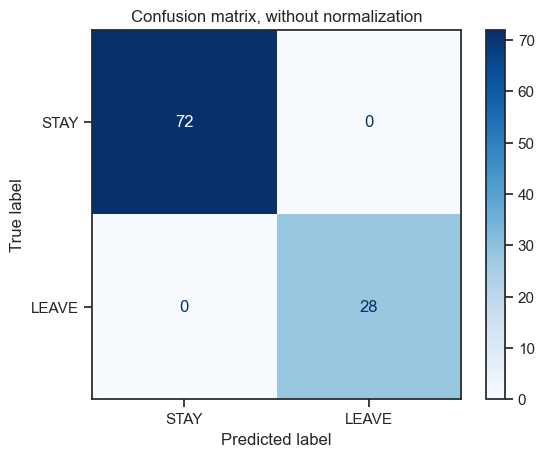

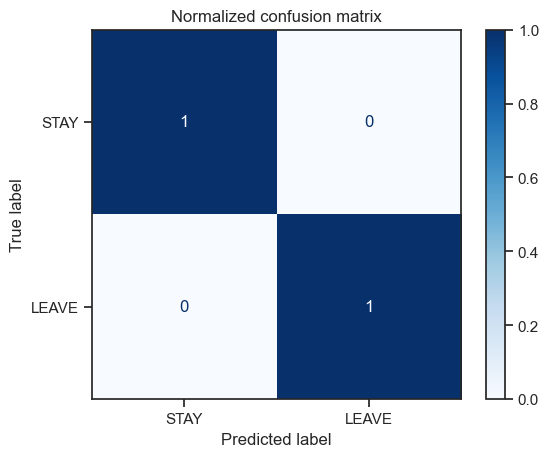

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import datasets, metrics, model_selection, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

classifier = lin_model

#decision_tree = DecisionTreeClassifier(max_depth=6, criterion="entropy",max_leaf_nodes = 12, min_samples_leaf = 1) 
## Let's tell the model what is the data
#decision_tree.fit(X_train, y_train)

#scores = cross_val_score(decision_tree, X_train, y_train, cv = 10)

y_pred = classifier.predict(predictor_cols)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        predictor_cols,
        y_pred,
        display_labels=["STAY","LEAVE"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()



In [44]:
scores = cross_val_score(classifier, predictor_cols, target_col, cv = 10)

print("Cross validation scores: {}".format(scores))
print("Average cross validation score: \t\t{:.2f}".format(scores.mean()))
print("Std. dev of cross validation score: \t\t{:.2f}".format(scores.std()))
print("Minimum of cross validation score: \t\t{:.2f}".format(scores.min()))
y_pred = lin_model.predict(X_test)
print("Test set score: \t\t\t\t{:.2f}".format(np.mean(y_pred == y_test)))

#we weren't asked to, but it would seem to be that our model is overfitting our data likely to small sample size

Cross validation scores: [0.5 0.5 0.8 0.7 0.7 0.7 0.8 0.8 0.6 0.8]
Average cross validation score: 		0.69
Std. dev of cross validation score: 		0.11
Minimum of cross validation score: 		0.50
Test set score: 				0.80


In [39]:
logit_mod = sm.Logit(target_col, predictor_cols)

logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


In [40]:
print(logit_res.summary())

                             Logit Regression Results                             
Dep. Variable:     Coupon-Usage-Indicator   No. Observations:                  100
Model:                              Logit   Df Residuals:                       97
Method:                               MLE   Df Model:                            2
Date:                    Mon, 30 Oct 2023   Pseudo R-squ.:                  0.1012
Time:                            16:01:48   Log-Likelihood:                -60.487
converged:                           True   LL-Null:                       -67.301
Covariance Type:                nonrobust   LLR p-value:                  0.001098
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending(000)     0.3416      0.129      2.655      0.008       0.089       0.594
Card    

In [28]:
print("Parameters: ", logit_res.params)

Parameters:  const           -2.146373
Spending(000)    0.341643
Card             1.098732
dtype: float64
